In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in DataFrame format
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualization aesthetics


In [4]:
np.random.seed(36)  # setting random seed for reproducibility

n_samples = 500  # defining the number of data samples
age = np.random.randint(18, 60, n_samples) # generating random ages between 18 and 60
height = np.random.randint(140, 200, n_samples) #generating random heights between 140 cm and 200 cm

X = np.c_[age, height] # Combining age and height as features 

y = (age * 0.5 + height / 5 + np.random.randn(n_samples) * 5 > 50).astype(int) # Creating binary classification labels with some noise

data = pd.DataFrame({'Age': age, 'Height': height, 'Class': y})# Storing the generated data in a DataFrame


data.head()# Displaying the first few rows of the dataset

,Age,Height,Class
0,23,183,1
1,52,182,1
2,48,172,1
3,58,170,1
4,51,189,1


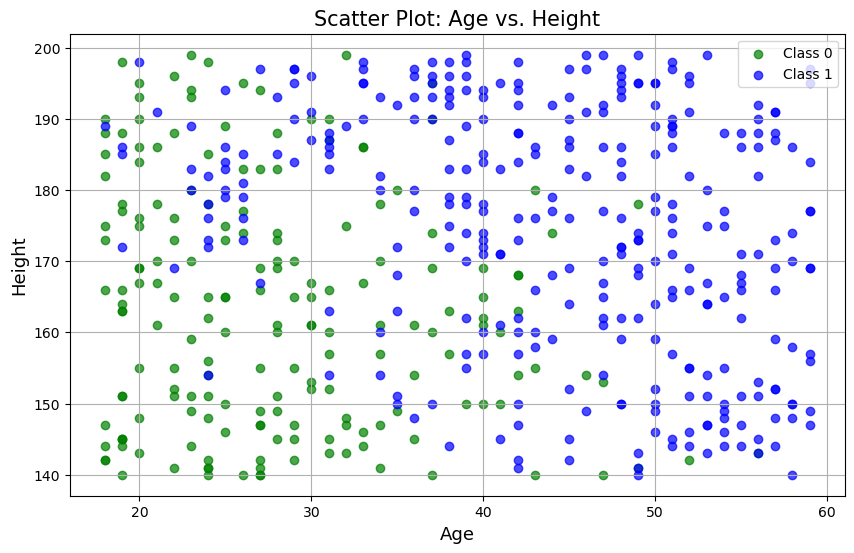

In [5]:
plt.figure(figsize=(10, 6))  # Setting figure size

for label, color in zip([0, 1], ['green', 'blue']):
    plt.scatter(data[data['Class'] == label]['Age'],  # X-axis: Age
                data[data['Class'] == label]['Height'],  # Y-axis: Height
                c=color, label=f'Class {label}', alpha=0.7)  # Adding label and color

plt.title('Scatter Plot: Age vs. Height', fontsize=15)  # Setting plot title
plt.xlabel('Age', fontsize=13)  # Label for X-axis
plt.ylabel('Height', fontsize=13)  # Label for Y-axis
plt.legend()  # Displaying the legend
plt.grid(True)  # Adding grid for better readability
plt.show()  # Displaying the plot


In [6]:

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)#standardizing features (Mean = 0, Std Dev = 1)
X = np.c_[np.ones(X.shape[0]), X] # Adding an intercept term 


In [7]:
tr_size = int(0.8 * n_samples)
X_train, X_test = X[:tr_size], X[tr_size:]
y_train, y_test = y[:tr_size], y[tr_size:]


In [8]:
# Sigmoid function: Converts input into probability (0 to 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
#  Computes binary cross-entropy loss-loss_fn
def loss_fn(X, y, beta):
    m = len(y)
    z = X @ beta  # Linear combination
    predictions = sigmoid(z)  # get probabilities
    loss = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss


In [10]:
# Gradient Descent for Logistic Regression
def log_reg(X, y, beta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = X @ beta  # Compute predictions
        predictions = sigmoid(z)

        gradient = (1 / m) * (X.T @ (predictions - y)) # Compute gradient
        beta -= learning_rate * gradient # Update parameters

        if i % 1000 == 0:  # Print loss every 1000 iterations
            loss = loss_fn(X, y, beta)
            print(f"Iteration {i}: loss {loss}")

    return beta

In [11]:
# Iinitializing coefficients
beta = np.zeros(X_train.shape[1])  
learning_rate = 0.01
num_iterations = 10000

# Train logistic regression model
beta = log_reg(X_train, y_train, beta, learning_rate, num_iterations)

Iteration 0: loss 0.6918799640574436
Iteration 1000: loss 0.3900288772890331
Iteration 2000: loss 0.3636877274315279
Iteration 3000: loss 0.3566726246078293
Iteration 4000: loss 0.35415513905317697
Iteration 5000: loss 0.35312146689637025
Iteration 6000: loss 0.35266451090659773
Iteration 7000: loss 0.3524532847933618
Iteration 8000: loss 0.35235282219256164
Iteration 9000: loss 0.3523041306951155


In [12]:
# Function to predict class labels based on probability threshold {default 0.5}
def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    return (probabilities >= threshold).astype(int)


In [13]:
# Compute accuracy of predictions
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [15]:
# Predict on training and test sets
y_pred_train = predict(X_train, beta)
y_pred_test = predict(X_test, beta)

test_accuracy = accuracy(y_test, y_pred_test) # Compute accuracy - test set
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%") # display the final accuracy result


Testing Accuracy: 87.00%
